# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m = 1
A = 0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [2]:
using Quadmath, Printf

res=m;
N=2.0^m*5000.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
Nt=2.0^m*5000.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [3]:
print(N)

5000.0

In [4]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [5]:
using Printf
include("./ScalarField.jl");
include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [6]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)


step size is  0.0002
the time step is 0.0001


# Initial data of m β Ψ and Ψ,x

In [7]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [8]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [9]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [10]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);
state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

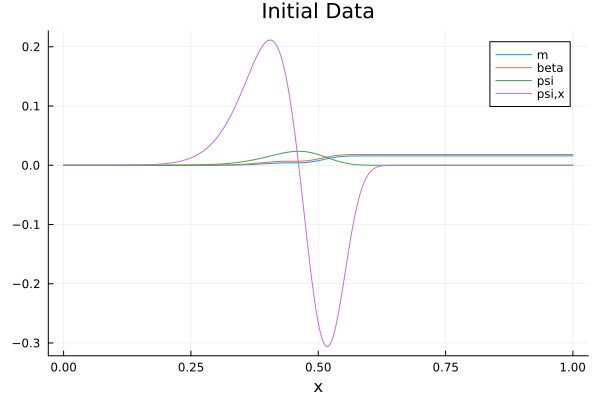

In [11]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

In [12]:
"""using TickTock
tick()
a=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5])#doublegrid(initX1)
tock()

tick()
f=Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
b=f(initX1)

#println(a.-b)
tock()

#plot(initX1, a.-init_gaussian_der(initX1,r0,sigma,A))
plot(doublegrid(initX1), a.-init_gaussian_der(doublegrid(initX1),r0,sigma,A))""";


# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [13]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [14]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [15]:
ginit=speed(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.0008002400640157


In [16]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [17]:
finaltime=1.3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 10 dt is 0.0002000800240064016, t=0.0020008002400640156 speed is 0.49980002, dx/dt=0.99960004


iteration 20 dt is 0.0002000800240064016, t=0.004001600480128031 speed is 0.49980002, dx/dt=0.99960004


iteration 30 dt is 0.0002000800240064016, t=0.006002400720192051 speed is 0.49980002, dx/dt=0.99960004


iteration 40 dt is 0.0002000800240064016, t=0.00800320096025607 speed is 0.49980002, dx/dt=0.99960004


iteration 50 dt is 0.0002000800240064016, t=0.01000400120032008 speed is 0.49980002, dx/dt=0.99960004


iteration 60 dt is 0.0002000800240064016, t=0.012004801440384091 speed is 0.49980002, dx/dt=0.99960004


iteration 70 dt is 0.0002000800240064016, t=0.014005601680448102 speed is 0.49980002, dx/dt=0.99960004


iteration 80 dt is 0.0002000800240064016, t=0.016006401920512114 speed is 0.49980002, dx/dt=0.99960004


iteration 90 dt is 0.0002000800240064016, t=0.018007202160576143 speed is 0.49980002, dx/dt=0.99960004


iteration 100 dt is 0.00020008002400640163, t=0.020008



iteration 740 dt is 0.00020008002400640163, t=0.14805921776473596 speed is 0.49980001999999996, dx/dt=0.9996000399999999


iteration 750 dt is 0.00020008002400640163, t=0.15006001800479996 speed is 0.49980001999999996, dx/dt=0.9996000399999999


iteration 760 dt is 0.0002000800240064016, t=0.15206081824486395 speed is 0.49980002, dx/dt=0.99960004


iteration 770 dt is 0.0002000800240064016, t=0.15406161848492794 speed is 0.49980002, dx/dt=0.99960004


iteration 780 dt is 0.0002000800240064016, t=0.15606241872499194 speed is 0.49980002, dx/dt=0.99960004


iteration 790 dt is 0.0002000800240064016, t=0.15806321896505593 speed is 0.49980002, dx/dt=0.99960004


iteration 800 dt is 0.0002000800240064016, t=0.16006401920511992 speed is 0.49980002, dx/dt=0.99960004


iteration 810 dt is 0.0002000800240064016, t=0.16206481944518392 speed is 0.49980002, dx/dt=0.99960004


iteration 820 dt is 0.0002000800240064016, t=0.1640656196852479 speed is 0.49980002, dx/dt=0.99960004


iteration 830 dt i



iteration 1480 dt is 0.0002000800240064016, t=0.2961184355294715 speed is 0.49980002, dx/dt=0.99960004


iteration 1490 dt is 0.00020008002400640163, t=0.2981192357695355 speed is 0.49980001999999996, dx/dt=0.9996000399999999


iteration 1500 dt is 0.00020008002400640157, t=0.30012003600959947 speed is 0.49980002000000007, dx/dt=0.9996000400000002


iteration 1510 dt is 0.0002000800240064016, t=0.30212083624966346 speed is 0.49980002, dx/dt=0.99960004


iteration 1520 dt is 0.00020008002400640163, t=0.30412163648972745 speed is 0.49980001999999996, dx/dt=0.9996000399999999


iteration 1530 dt is 0.0002000800240064016, t=0.30612243672979145 speed is 0.49980002, dx/dt=0.99960004


iteration 1540 dt is 0.0002000800240064016, t=0.30812323696985544 speed is 0.49980002, dx/dt=0.99960004


iteration 1550 dt is 0.0002000800240064016, t=0.31012403720991943 speed is 0.49980002, dx/dt=0.99960004


iteration 1560 dt is 0.00020008002400640157, t=0.3121248374499834 speed is 0.49980002000000007, dx



iteration 2210 dt is 0.00020008002400640163, t=0.442176853054143 speed is 0.49980001999999996, dx/dt=0.9996000399999999


iteration 2220 dt is 0.00020008002400640163, t=0.444177653294207 speed is 0.49980001999999996, dx/dt=0.9996000399999999


iteration 2230 dt is 0.0002000800240064016, t=0.446178453534271 speed is 0.49980002, dx/dt=0.99960004


iteration 2240 dt is 0.00020008002400640163, t=0.448179253774335 speed is 0.49980001999999996, dx/dt=0.9996000399999999


iteration 2250 dt is 0.0002000800240064016, t=0.450180054014399 speed is 0.49980002, dx/dt=0.99960004


iteration 2260 dt is 0.0002000800240064016, t=0.45218085425446297 speed is 0.49980002, dx/dt=0.99960004


iteration 2270 dt is 0.00020008002400640163, t=0.45418165449452697 speed is 0.49980001999999996, dx/dt=0.9996000399999999


iteration 2280 dt is 0.00020008002400640163, t=0.45618245473459096 speed is 0.49980001999999996, dx/dt=0.9996000399999999


iteration 2290 dt is 0.0002000800240064016, t=0.45818325497465495 spee



iteration 2890 dt is 0.00020008002400640455, t=0.5782312693784946 speed is 0.49980001999999263, dx/dt=0.9996000399999853


iteration 2900 dt is 0.00020008002400640482, t=0.5802320696185586 speed is 0.49980001999999196, dx/dt=0.9996000399999839


iteration 2910 dt is 0.0002000800240064051, t=0.5822328698586225 speed is 0.4998000199999913, dx/dt=0.9996000399999826


iteration 2920 dt is 0.0002000800240064054, t=0.5842336700986865 speed is 0.4998000199999905, dx/dt=0.9996000399999811


iteration 2930 dt is 0.00020008002400640572, t=0.5862344703387505 speed is 0.49980001999998974, dx/dt=0.9996000399999795


iteration 2940 dt is 0.00020008002400640604, t=0.5882352705788145 speed is 0.4998000199999889, dx/dt=0.9996000399999778


iteration 2950 dt is 0.0002000800240064064, t=0.5902360708188785 speed is 0.499800019999988, dx/dt=0.999600039999976


iteration 2960 dt is 0.0002000800240064068, t=0.5922368710589425 speed is 0.499800019999987, dx/dt=0.999600039999974


iteration 2970 dt is 0.0002



iteration 3570 dt is 0.00020008002400651007, t=0.7142856857028735 speed is 0.49980001999972906, dx/dt=0.9996000399994581


iteration 3580 dt is 0.00020008002400651045, t=0.7162864859429386 speed is 0.4998000199997281, dx/dt=0.9996000399994562


iteration 3590 dt is 0.00020008002400651056, t=0.7182872861830037 speed is 0.49980001999972784, dx/dt=0.9996000399994557


iteration 3600 dt is 0.00020008002400651037, t=0.7202880864230689 speed is 0.4998000199997283, dx/dt=0.9996000399994567


iteration 3610 dt is 0.0002000800240065098, t=0.722288886663134 speed is 0.4998000199997297, dx/dt=0.9996000399994595


iteration 3620 dt is 0.00020008002400650902, t=0.7242896869031991 speed is 0.49980001999973167, dx/dt=0.9996000399994635


iteration 3630 dt is 0.00020008002400650782, t=0.7262904871432642 speed is 0.49980001999973467, dx/dt=0.9996000399994693


iteration 3640 dt is 0.00020008002400650633, t=0.7282912873833293 speed is 0.4998000199997384, dx/dt=0.9996000399994768


iteration 3650 dt is



iteration 4250 dt is 0.00016913647815762256, t=0.8445229680217223 speed is 0.5912385139461606, dx/dt=1.1824770278923211


iteration 4260 dt is 0.00016858385018848456, t=0.8462112772986299 speed is 0.5931766292453006, dx/dt=1.1863532584906011


iteration 4270 dt is 0.00016805031305054064, t=0.8478941657502213 speed is 0.5950598852495163, dx/dt=1.1901197704990325


iteration 4280 dt is 0.00016753534208505713, t=0.8495718215073116 speed is 0.5968889832763188, dx/dt=1.1937779665526376


iteration 4290 dt is 0.00016703833086138497, t=0.8512444268532069 speed is 0.5986649859605216, dx/dt=1.1973299719210433


iteration 4300 dt is 0.0001665586459941726, t=0.8529121578524634 speed is 0.6003891266232959, dx/dt=1.2007782532465918


iteration 4310 dt is 0.00016609558213330147, t=0.8545751839763194 speed is 0.6020629731123379, dx/dt=1.2041259462246758


iteration 4320 dt is 0.00016564844546614507, t=0.8562336677521145 speed is 0.6036881283044568, dx/dt=1.2073762566089137


iteration 4330 dt is 0.

LoadError: InterruptException:

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04925.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04925.gif")
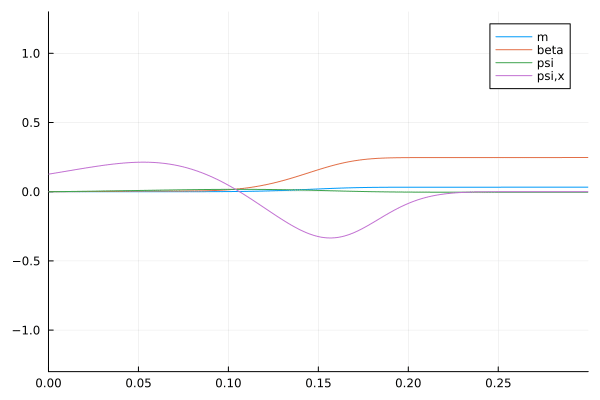

In [315]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 3500:10:5500
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-1.3, 1.3],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
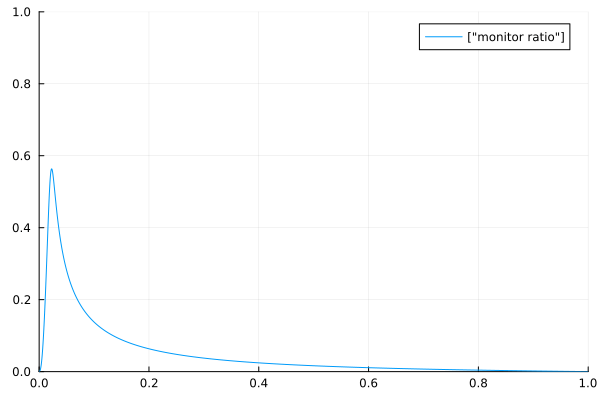

In [271]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

muninn animation

In [68]:
using Plots, CSV, DataFrames
import GR

lines = readlines(dir*"/res$res/data.txt")
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]

anim = @animate for n in 1:10
    
    for line in lines
        
    if occursin("Time", line)==true
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))

        end
    end



    #
    
    IJulia.clear_output(true)
    

    plot()
    
    
    plot!(grid[4:L-3], [m beta psi derpsi][4:L-3,:], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.001, 0.001],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1200)

LoadError: syntax: incomplete: "for" at In[68]:11 requires end

In [118]:
datagrid=Array{Float128}(undef, L)
datam=Array{Float128}(undef, L)
databeta=Array{Float128}(undef, L)
datapsi=Array{Float128}(undef, L)
dataderpsi=Array{Float128}(undef, L)

lines = readlines(dir*"/res$res/data.txt")

for line in lines
    if occursin("Time", line)==true
        plot(grid, m)
        
        
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
        
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))
        elseif a==[]
            #println(length(datagrid))
            #println(length(grid))
            #datagrid=cat(dims=2,datagrid, grid)
            datagrid=[datagrid; grid]
            datam=cat(dims=2,datam, m)
            databeta=cat(dims=2,databeta, beta)
            datapsi=cat(dims=2,datapsi, psi)
            dataderpsi=cat(dims=2,dataderpsi, derpsi)
        end
    end
    
end


In [119]:
datagrid

5796-element Vector{Any}:
    8.34319962899321883561303658422435691e-4956
    2.05206491026800433201677921073574507e-4936
 -nan
    8.34319963676342897893866671733368366e-4956
    1.53904868514964416335782103718351843e-4936
    2.77150719072578205953599890496588243e-4938
    1.19445898260724901253333516414690294e-4946
    1.53904868634410314596507031525083490e-4936
    2.77150776406609371101565222808974947e-4938
 -nan
    1.53904868753856212857231959331815136e-4936
    2.77150833740640536249530555121361651e-4938
    8.34319965554143682530893953901455664e-4956
    ⋮
    0.96
    0.965
    0.97
    0.975
    0.98
    0.985
    0.99
    0.995
    1.0
    1.005
    1.01
    1.015

In [117]:
A = Matrix{Int}(undef, 0, 2)  # 0x2 array of Int
B = rand(5, 2)
A = [A; B] 

5×2 Matrix{Float64}:
 0.12618    0.261235
 0.238235   0.840988
 0.200322   0.354143
 0.347195   0.854355
 0.0130686  0.727983

In [21]:
parse(Float64,"1")

1.0

In [47]:
dir*"/res$res/data.txt"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/data.txt"

In [ ]:
with open(dir) as f:
    for line in f:

        index = line.find("Time")
        if index==1:
            time.append(line[index+7:len(line)-1])
            auxgrid=[]
            auxm=[]
            auxbeta=[]
            auxpsi=[]
            auxderpsi=[]

        else:
                a=line.split()
                if a!=[]:
                    auxgrid.append(float(a[0]))
                    auxm.append(float(a[1]))
                    auxbeta.append(float(a[2]))
                    auxpsi.append(float(a[3]))
                    auxderpsi.append(float(a[4]))
                elif a==[]:
                    grid.append(auxgrid)
                    m.append(auxm)
                    beta.append(auxbeta)
                    psi.append(auxpsi)
                    derpsi.append(auxderpsi)
        datatime.append(time)
        datagrid.append(grid)
        datam.append(m)
        databeta.append(beta)
        datapsi.append(psi)
        dataderpsi.append(derpsi)

In [59]:
a=[ "ola tudo bem"]
split(a," ")

LoadError: MethodError: no method matching split(::Vector{String}, ::String)
[0mClosest candidates are:
[0m  split([91m::T[39m, ::Any; limit, keepempty) where T<:AbstractString at strings/util.jl:592

In [62]:
using DelimitedFiles

readdlm(dir*"/res$res/data.txt", ',',Int)

LoadError: unexpected character 'T' after quoted field at row 1 column 1

In [360]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [361]:
twod_epsilon(dt,dx)

3.12500000000000000000000000000000000e-02

In [363]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [147]:
twod_epsilon(dt,dx)

0.3125